<table>
    <tr style="background-color:white;">
        <td width="60%">
            <div style="height: 25px;"></div>
            <div align="left" style="color: #4b324e; font-size: 40px; font-weight: bold;">Taller de Qiskit</div>
        </td>
        <td>
            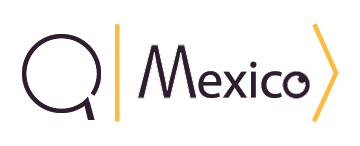
        </td>
    </tr>
</table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

<div align="center" style="color: #EE2A6F; font-size: 30px; font-weight: bold;">Dispositivos cuánticos reales</div>

<div align="right" style="font-size: 15px; font-weight: normal;">Preparado por Claudia Zendejas-Morales</div>

<a href="https://opensource.org/licenses/Apache-2.0"></a>

# Contenido

1. [Introducción](#intro)
   1. [Criterios de DiVincenzo](#intro.1)
   2. [Implementaciones de qubits](#intro.2)
   3. [Tipos de cuentas en IBM Quantum Experience](#intro.3)
   4. [Tipos de procesadores IBM Quantum](#intro.4)
   5. [Proveedores](#intro.5)
2. [Ejecución en dispositivos reales](#secc1)
   1. [Cargar cuenta](#secc1.1)
   2. [Ejecutar un experimento](#secc1.2)
   3. [Backends disponibles ](#secc1.3)
      1. [Simuladores en la nube](#secc1.3.1)
      2. [Dispositivos reales en la nube](#secc1.3.2)
   4. [Ejecutar un experimento en un dispositivo real](#secc1.4)
   5. [Conociendo tu backend](#secc1.5)
   6. [Jobs](#secc1.6)
   7. [Configuración del sistema](#secc1.7)
3. [Referencias](#secc2)

<a id="intro"></a>
# Introducción

Al crear circuitos cuánticos, lo primero que queremos hacer es probar que funciona como lo esperamos, de acuerdo a como lo diseñamos para resolver nuestro problema. Para ello es muy útil ejecutar dicho circuito, y la primer aproximación es a través de simuladores, es decir, durante las iteraciones de desarrollo (análisis, diseño, creación) de nuestros circuitos, lo que debemos hacer es ir probando el progreso de dicho desarrollo. 

Pero una vez que consideramos que está listo nuestro circuito (o ya muy cerca de estarlo), lo más conveniente es ejecutarlo en una computadora cuántica real, para que nuestros resultados dejen de ser simulaciones y aprovechen los fenómenos de la física cuántica.

Por dispositivo real, nos estamos refiriendo a una computadora cuántica que implementa los qubits de alguna manera física, a los cuales les aplicaremos compuertas para provocar estados que deseemos de acuerdo a nuestro diseño de solución a un problema, y finalmente hacer que los estados cuánticos colapsen y nos den una respuesta.

Afortunadamente tenemos acceso a estas computadoras cuánticas reales, IBM por ejemplo, desde 2016, nos permite acceder a algunos de sus dispositivos, a través de su plataforma [IBM Quantum Experience](https://quantum-computing.ibm.com/) y podemos programar esas computadoras cuánticas con ayuda de Qiskit.

<a id="intro.1"></a>
## Criterios de DiVincenzo

Los criterios de [DiVincenzo](https://en.wikipedia.org/wiki/David_P._DiVincenzo) son condiciones necesarias, propuestas en 2000, que actualmente son consideradas una base para construir una computadora cuántica, una computadora de este tipo, que fue propuesta por primera vez por el matemático [Yuri Manin](https://en.wikipedia.org/wiki/Yuri_Manin), en 1980, y el físico [Richard Feynman](https://en.wikipedia.org/wiki/Richard_Feynman), en 1982, como un medio para simular de manera eficiente sistemas cuánticos, como para resolver el problema cuántico de muchos cuerpos.

Han habido muchas propuestas sobre cómo construir una computadora cuántica, las cuales cumplen con diversos grados de éxito frente a los diferentes desafíos de la construcción de dispositivos cuánticos. Algunas de estas propuestas involucran el uso de qubits superconductores, iones atrapados, resonancia magnética nuclear en estado líquido y sólido, o estados de agrupamiento óptico, todas ellas muestran buenas perspectivas pero también tienen problemas al momento de su implementación práctica.

Los **criterios de DiVincenzo** consisten en siete condiciones que una configuración experimental debe satisfacer para implementar con éxito algoritmos cuánticos. Las primeras cinco condiciones se refieren a la computación cuántica en sí. Dos condiciones adicionales se refieren a la implementación de la comunicación cuántica, como la que se usa en la distribución de claves cuánticas. Se puede demostrar que los criterios de DiVincenzo son satisfechos por una computadora clásica. La comparación de la capacidad de los regímenes clásico y cuántico para satisfacer los criterios destaca tanto las complicaciones que surgen al tratar con sistemas cuánticos como el origen de la [aceleración cuántica](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm).

Según los criterios, cualquier computadora cuántica debe facilitar lo siguiente:

- un sistema físico escalable con qubits bien caracterizados;
- la capacidad de inicializar el estado de los qubits a un [estado fiducial](https://en.wikipedia.org/wiki/Fiducial#In%20particle%20physics) simple, como $\ket{000\cdots}$;
- tiempos relevantes de decoherencia largos, mucho más largos que el tiempo de operación de la compuerta;
- un conjunto universal de compuertas cuánticas;
- una capacidad de medición específica del qubit.
- la capacidad de interconvertir qubits estacionarios y [qubits "voladores" (flying qubits)](https://quantumcomputing.stackexchange.com/questions/8900/what-is-a-flying-qubit);
- la capacidad de transmitir fielmente qubits "voladores" entre ubicaciones específicas

Los primeros cinco criterios fueron originalmente [formulados por DiVincenzo en 1996](https://arxiv.org/pdf/cond-mat/9612126.pdf). Después, DiVincenzo formuló [dos criterios más para la comunicación cuántica](https://onlinelibrary.wiley.com/doi/10.1002/1521-3978(200009)48:9/11%3C771::AID-PROP771%3E3.0.CO;2-E).

Hoy, la computación cuántica es un campo en crecimiento activo, y en fechas recientes, DiVincenzo puntualiza: "Las nuevas listas de criterios para 2020 no están a nivel de jardín de niños. Abordan cuestiones detalladas como la modularidad de la operación, la necesidad de una pila de software completa y los detalles de los protocolos de encendido y calibración". También señala que la ingeniería de una computadora cuántica se ha convertido en una tarea compleja que involucra no solo un sistema cuántico bien controlado con decenas o incluso cientos de qubits, sino también interconversiones de qubits a bits, y un sistema de control clásico que debe funcionar en tiempo real, de manera rápida y con alta precisión.

<a id="intro.2"></a>
## Implementaciones de qubits

Actualmente existen diferentes tecnologías para implementar físicamente un qubit, aquí mencionamos algunas de ellas, para conocer más detalles refiérete a los enlaces de cada tipo de qubits.

- [Átomos neutros](https://arxiv.org/pdf/2006.12326.pdf)
- [Iones atrapados](https://arxiv.org/pdf/1904.04178.pdf)
- [Electrón atrapado o centro de color](https://aip.scitation.org/doi/full/10.1063/5.0007444), por ejemplo los [centros de vacantes de nitrógeno (NV)](https://en.wikipedia.org/wiki/Nitrogen-vacancy_center) en diamantes
- [Espínes de electrones](https://www.nii.ac.jp/qis/first-quantum/forStudents/lecture/pdf/noise/chapter14.pdf), por ejemplo los [quantum dots](https://en.wikipedia.org/wiki/Quantum_dot)
- [Superconductores](https://arxiv.org/pdf/1904.06560.pdf)
- [Resonancia magnética nuclear](https://arxiv.org/ftp/arxiv/papers/1501/1501.01353.pdf) (Nuclear Magnetic Resonance, NMR)
- [Qubits ópticos](https://arxiv.org/ftp/quant-ph/papers/0406/0406192.pdf)
- [Qubits topológicos](https://www.sciencedaily.com/releases/2021/07/210701140937.htm)

<a id="intro.3"></a>
## Tipos de cuentas en IBM Quantum Experience

La plataforma [IBM Quantum Experience](https://quantum-computing.ibm.com/) permite el acceso a las computadoras cuánticas de IBM mediante la nube, todo lo que requires es generar una cuenta para tener acceso a estos dispositivos cuánticos con **qubits superconductores**.

IBM proporciona una variedad de [tipos de cuenta](https://www.ibm.com/quantum-computing/), para cumplir diferentes propósitos:

- [Para desarrolladores](https://www.ibm.com/quantum-computing/developers/). Con esta cuenta puedes programar código en Python, usando el SDK Qiskit para mandar instrucciones a  las computadoras de IBM y así ejecutar tus experimentos en dispositovos reales. Este es el tipo de cuenta que necesitarás para aprender y para este taller. **¡Crea tu cuenta!** usando [este enlace](https://quantum-computing.ibm.com/).
- [Para educadores](https://www.ibm.com/quantum-computing/educators-program/). Como parte del crecimiento del campo de la computación cuántica, es necesario tener personas encargadas de enseñar este tema tan innovador. Este tipo de cuenta tiene beneficios como acceso a encolamiento equitativo para la ejecución de los experimentos, acceso a sistemas exclusivos, entre otros, considerando la necesidad de poder explicar temas con cierta agilidad.
- [Para investigadores](https://www.ibm.com/quantum-computing/researchers/). Esta cuenta permite a los investigadores académicos realizar trabajos científicos avanzados en cuántica. Provee acceso a más sistemas y se pueden obtener premios especiales para completar experimentos y publicar artículos, sin costo para el investigador.
- [Para negocios](https://www.ibm.com/quantum-computing/business/). Este tipo de cuenta es para las empresas o instituciones que están desarrollando tecnologías con computación cuántica, y como tales tienen beneficios especiales.

<a id="intro.4"></a>
## Tipos de procesadores IBM Quantum

Los tipos de procesadores cuánticos de IBM reciben el nombre de acuerdo a las cualidades tecnológicas generales que se incluyen en las construcciones, que consisten en la **familia** y la **revisión**. Familia (por ejemplo, _Falcon_) se refiere al tamaño y escala de los circuitos posibles en el chip. Esto está determinado principalmente por el número de qubits y el gráfico de conectividad (arquitectura). Las revisiones (por ejemplo, _r1_) son variantes de diseño dentro de una familia determinada, que a menudo conducen a mejoras en el rendimiento o compensaciones. Los segmentos (por ejemplo, _L_) se componen de subsecciones de chips. 

Algunos ejemplos:

- **Hummingbird**. Con un diseño de qubit hexagonal pesado, la familia Hummingbird permite hasta 65 qubits.
- **Falcon**. La familia de dispositivos Falcon ofrece una plataforma valiosa para circuitos de mediana escala, y también sirve como una plataforma valiosa para demostrar mejoras de rendimiento y escalabilidad antes de que se implementen en dispositivos más grandes.
- **Canary**. La familia Canary comprende pequeños diseños que contienen entre 5 y 16 qubits. Provee una red de 2 dimensiones optimizada, debido a que todos los qubits y resonadores de lectura están en la misma capa.

Una lista de sistemas disponibles se ve como la imagen de abajo, en donde se puede apreciar la familia del sistema, su revisión, la cantidad de qubits, si está en línea o no, así como su nombre particular (el que usamos para mandar nuestros circuitos cuánticos).

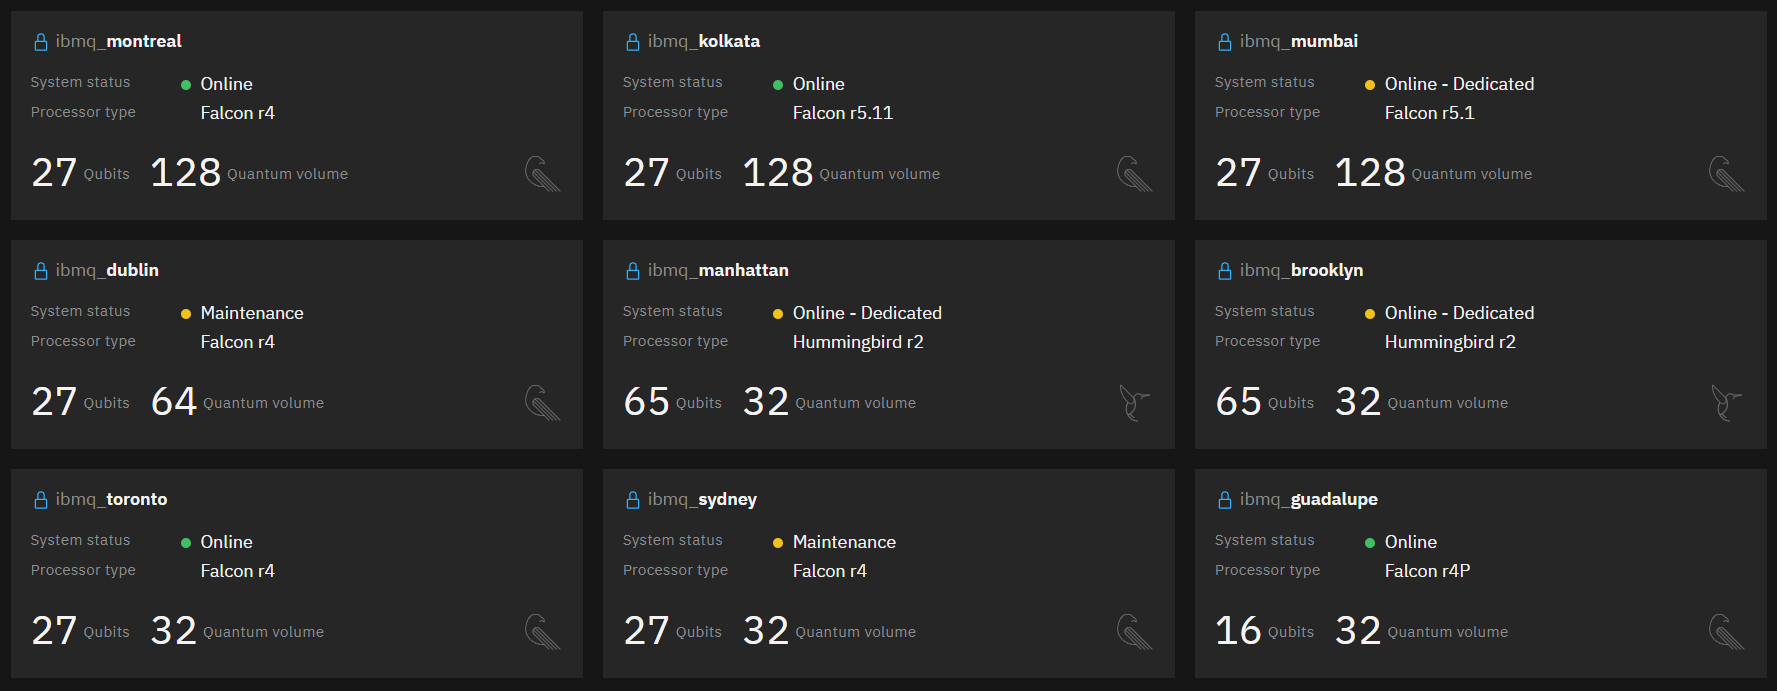

<a id="intro.5"></a>
## Proveedores

El acceso a los diversos servicios ofrecidos por IBM Quantum está controlado por los proveedores a los que estás asignado (una vez creada tu cuenta). Un proveedor está definido por una organización jerárquica de _hub_, _group_ y _project_. Un _hub_ es el nivel superior de una jerarquía (organización) determinada y contiene en su interior uno o más _groups_. Estos grupos, a su vez, están poblados de proyectos. La combinación de _hub/group/project_ se denomina **proveedor**. Los usuarios pueden pertenecer a más de un proveedor en un momento dado.

Los usuarios con una cuenta pública (para desarrolladores) pertenecen automáticamente al proveedor abierto _ibm-q/open/main_. Para organizaciones fuera de IBM, los administradores de concentradores o grupos designados asignan usuarios a los proveedores. Para ver los proveedores a los que tienes acceso, consulta la parte inferior de la [página de tu cuenta](https://quantum-computing.ibm.com/).

Cuando ejecutas una tarea utilizando un servicio IBM Quantum (por ejemplo, enviando circuitos a un sistema cuántico o a un simulador), se devuelve una instancia de `job`. Independientemente del servicio que se utilice, un _job_ puede rastrear el progreso del envío a través de IBM Quantum y recuperar los resultados finales del cálculo. Debido a que los servicios están acoplados a los proveedores, los _jobs_ creados a partir de estos servicios también están vinculados al proveedor específico que se utiliza. Por lo tanto, si un usuario se elimina de un proveedor, sus trabajos y los resultados asociados ya no serán accesibles.

Para garantizar que todos los usuarios con cuenta pública puedan utilizar los sistemas de IBM Quantum de manera justa, el proveedor al que pertenecen (_ibm-q/open/main_) limita el número de trabajos que se pueden ejecutar o encolar en un dispositivo determinado en cualquier momento a un máximo de cinco. Enviar más de cinco a la vez dará lugar al error de [Quantum Cloud #3458](https://quantum-computing.ibm.com/lab/docs/iql/manage/errors#error3458).

<a id="secc1"></a>
# Ejecución en dispositivos reales

Para continuar con el resto del notebook, debes tener una cuenta verificada en la plataforma [IBM Quantum Experience](https://quantum-computing.ibm.com/).

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.providers.jobstatus import JobStatus
from time import sleep
from IPython.display import clear_output

<a id="secc1.1"></a>
## Cargar cuenta

Para conectarte a los dispositivos en la nube, debes dirigirte a los detalles de tu [cuenta](https://quantum-computing.ibm.com/account) dentro de la plataforma, y generar un **Token**, el cual está formado por una cadena alfanumérica.

Una vez dentro de los detalles de tu cuenta, dirígete a la parte superior derecha para generar tu token, la misma plataforma te permite copiar esta cadena (es muy larga), una vez que la tengas copiada, pégala en la celda de abajo sustituyendo `TOKEN` y ejecuta el método `save_account()`.

**Nota**: no es necesario que ejecutes `save_account()` cada vez, con que lo hagas una vez será suficiente, incluso cuando pase mucho tiempo entre ejecuciones, tu _token_ quedará guardado en tu disco duro. A menos que por alguna razón regeneres tu _token_ entonces si será necesario que lo vuelvas a guardar.

Lo que si se debe hacer cada vez que inicias un contexto, por ejemplo abrir un nuevo notebook, es cargar tu cuenta con ayuda del método `IBMQ.load_account()`.

El método `IBMQ.providers()` nos muestra la lista de proveedores a los que tenemos acceso, por ejemplo, con una cuenta pública, solo veremos enlistado el proveedor _ibm-q/open/main_.

In [2]:
#IBMQ.save_account(TOKEN)   # guardar tu cuenta en tu disco duro

IBMQ.load_account()        # cargar cuenta desde el disco duro

IBMQ.providers()           # listar todos los proveedores disponibles (para tu cuenta)


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

<a id="secc1.2"></a>
## Ejecutar un experimento

Para ejecutar tus experimentos en un dispositivo real, lo primero es cargar la cuenta, como lo hicimos en la sección anterior, posteriormente debemos obtener el _proveedor_ que deseamos usar, y de éste obtener un _backend_ a donde enviaremos nuestro circuito cuántico.

El código para efectuar la ejecución es similar a como cuando lo hacemos con simuladores, es decir, usando el método `backend.run()` al cual le enviamos como parámetro el circuito que deseamos sea ejecutado en el dispositivo.

Veamos un ejemplo:

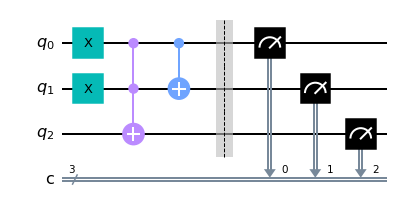

{'101': 1024}


In [3]:
provider = IBMQ.get_provider(hub='ibm-q')                  # obtenemos un proveedor

backend = provider.get_backend('ibmq_qasm_simulator')      # obtenemos un backend, en este ejemplo estamos usando
                                                           # un simulador, pero uno que se encuentra en la nube,
                                                           # es decir, la ejecución no ocurrirá en nuestra máquina local
                                                           # esto para obtener un resultado de manera rápida,
                                                           # más adelante veremos cómo ejecutar en un dispositivo real

qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qr, cr)                           # creamos un circuito de 3 qubits y 3 registros clásicos
circuit.x(qr[0])                                           # aplicamos algunas compuertas
circuit.x(qr[1]) 
circuit.ccx(qr[0], qr[1], qr[2])
circuit.cx(qr[0], qr[1])
circuit.barrier()
circuit.measure(qr, cr)                                    # agregamos mediciones a los 3 qubits

display(circuit.draw('mpl'))                               # mostramos el circuito

job = backend.run(circuit)                                 # mandamos ejecutar el circuito al backend en la nube,
                                                           # recuerda, este aún es un simulador, pero no local
                                                           # esta línea de código puede tardarse varios segundos, o
                                                           # incluso minutos dependiendo de la saturación de la red

result = job.result()                                      # la ejecución nos regresa un 'job'

counts = result.get_counts()                               # al que le podemos pedir los conteos

print(counts)                                              # imprimimos los conteos

Ya que hemos ejecutado nuestro primer ejemplo en la nube, ahora veamos más detalles de lo que tenemos a nuestra disposición para hacer estas ejecuciones.

<a id="secc1.3"></a>
## Backends disponibles 

Más arriba aprendimos que podemos conocer los proveedores disponibles de acuerdo a nuestra cuenta, con `IBMQ.providers()`. Ahora veamos a que _backends_ nos da acceso nuestro proveedor. Para ello utilizamos el método `backends()` del objeto `provider`:

In [4]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer

<a id="secc1.3.1"></a>
### Simuladores en la nube

Como podemos observar, también tenemos a nuestra disposición backends de simulación, la ventaja de estos backends en la nube es que no consumen recursos en nuestra máquina local y a su vez, al estar en los servidores de IBM, tienen grandes recursos para ejecutar nuestros circuitos.

Por ejemplo, el `ibmq_qasm_simulator` que acabamos de usar, tiene $32$ qubits, lo que significa que es capaz de manejar $2^{32}$ números complejos, y considerando que para representar un número complejo necesitamos 2 números reales, que en Python son tipos de datos flotantes, los cuales ocupan [$64$ bits](https://www.geeksforgeeks.org/python-float-type-and-its-methods/), lo cual implica un uso de memoria de

$$64\;\texttt{bits}\; \cdot \; 2\;\texttt{números reales}\;\cdot\;2^{32}\;\texttt{números complejos} = 64\;\texttt{Gigabytes}$$

Que es una cantidad de memoria RAM con la que pocas computadoras personales cuentan, además, esta es la cantidad de memoria **solo** para representar los quibits, además sigue siendo necesaria más memoria para el sistema operativo, para los cálculos con los qubits, para la representación de las compuertas cuánticas (recuerda que son matrices de $2^n\times 2^n$, con $n$ la cantidad de qubits, y estos números también son complejos), entre otros recursos necesarios para que funcione la computadora clásica (es clásica pues se trata de un simulador).

Por lo que considera el uso de estos simuladores en la nube, pues te pueden ser de gran ayuda al momento de ejecutar grandes circuitos cuánticos que llegues a necesitar al resolver problemas complejos.

<a id="secc1.3.2"></a>
### Dispositivos reales en la nube

Ahora bien, con nuestro proveedor también tenemos accceso a computadoras cuánticas reales y para saber cuales son, podemos aplicar un filtro y obtener así solamente los dispositivos reales:

In [5]:
# obtenemos todos los backends que no sean simuladores y que estén en línea

provider.backends(simulator=False, operational=True)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

Los filtros pueden ser más específicos, como en este ejemplo:

In [6]:
# obtenemos todos los backends con más de 2 qubits, que no sean simuladores y que estén en línea

provider.backends(filters=lambda x: x.configuration().n_qubits >= 2
                                    and not x.configuration().simulator
                                    and x.status().operational==True)

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

Esos dispositivos enlistados están al alcance de todos aquellos que tengan una cuenta en la plataforma, por lo que usualmente hay que formarse para que nuestros experimento sea ejecutado, esta formación cambia constatemente, si no nos importa mucho en qué dispositivo queremos ejecutar un experimento, simplemente debemos elegir un backend, pero si más bien lo que queremos es que se ejecute lo antes posible, podemos preguntar por el dispositivo menos ocupado, con la función `least_busy`.

In [7]:
devices = provider.backends(simulator=False, operational=True)

least_busy_device = least_busy(devices)                 # de la lista de dispositivos, averiguar cual es el menos ocupado

least_busy_device

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

<a id="secc1.4"></a>
## Ejecutar un experimento en un dispositivo real

La ejecución en un dispositivo real es muy similar a la ejecución en un dispositivo de simulación, con la salvedad de que es forzoso ejecutar la transpilación, debido a que los dispositivos reales solamente aceptan cierto conjunto de compuertas, esto se logra pasando el circuito por la función `transpile()`:

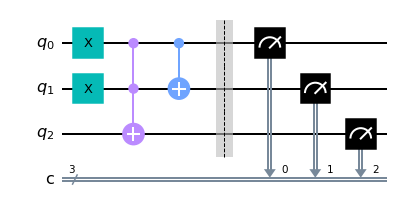

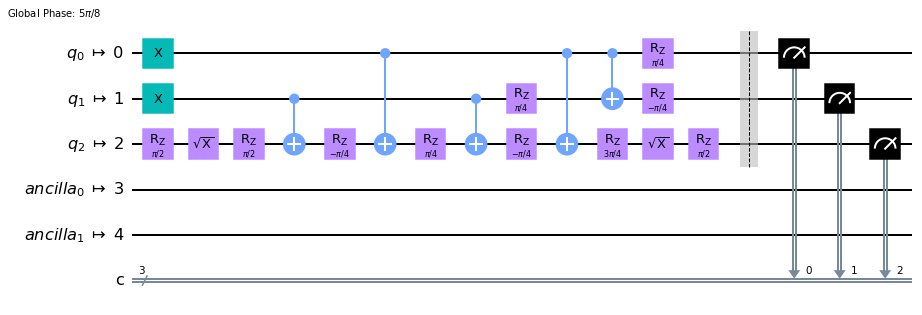

{'000': 14, '001': 113, '010': 36, '011': 61, '100': 49, '101': 558, '110': 31, '111': 162}


In [8]:
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qr, cr)                           # creamos un circuito de 3 qubits y 3 registros clásicos
circuit.x(qr[0])                                           # aplicamos algunas compuertas
circuit.x(qr[1]) 
circuit.ccx(qr[0], qr[1], qr[2])
circuit.cx(qr[0], qr[1])
circuit.barrier()
circuit.measure(qr, cr)                                    # agregamos mediciones a los 3 qubits

display(circuit.draw('mpl'))                               # mostramos el circuito

circuit = transpile(circuit, least_busy_device)            # transpilamos el circuito para el backend en específico

display(circuit.draw('mpl'))                               # mostramos el circuito transpilado

job = least_busy_device.run(circuit)                       # mandamos ejecutar el circuito al backend en la nube
                                                           # guardado en la variable 'least_busy_device'
                                                           # esta línea de código puede tardarse hasta varios minutos 
                                                           # dependiendo de la cantidad de 'jobs' encolados

result = job.result()                                      # la ejecución nos regresa un 'job'

counts = result.get_counts()                               # al que le podemos pedir los conteos

print(counts)                                              # imprimimos los conteos

<a id="secc1.5"></a>
## Conociendo tu backend

Podemos conocer más detalles de nuestro backend con la ayuda de sus métodos, para conocerlos todos, dirígete a su [especificación de API](https://qiskit.org/documentation/stubs/qiskit.providers.ibmq.IBMQBackend.html#qiskit.providers.ibmq.IBMQBackend.configuration), en las celdas siguientes vemos algunos ejemplos:

In [9]:
least_busy_device.provider()                       # desde que proveedor lo estamos accediendo 

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
least_busy_device.name()                           # cuál es su nombre

'ibmqx2'

In [11]:
least_busy_device.status()                         # su estado actual

In [12]:
least_busy_device.configuration().basis_gates      # las compuertas que puede manejar

['id', 'rz', 'sx', 'x', 'cx', 'reset']

In [13]:
least_busy_device.configuration().max_experiments  # el máximo de experimentos que puede manejar

75

In [14]:
least_busy_device.configuration().max_shots        # el máximo de iteraciones (shots)

8192

También podemos conocer sus propiedades que contienen información previamente medida y reportada:

In [15]:
props = least_busy_device.properties()

def describe_qubit(qubit, properties):

    # factores de conversión del SI de unidades
    μs = 1e6         # microsegundo
    ns = 1e9         # nanosegundos
    GHz = 1e-9       # Gigahertz

    print("El qubit {0} tiene un \n"
          "  - Tiempo T1 de {1} microsegundos\n"
          "  - Tiempo T2 de {2} microsegundos\n"
          "  - Error de la compuerta SX de {3}\n"
          "  - Duración de la compuerta SX de {4} nanosegundos\n"
          "  - frecuencia de resonancia de {5} GHz".format(
              qubit,
              properties.t1(qubit) * μs,
              properties.t2(qubit) * μs,
              properties.gate_error('sx', qubit),
              properties.gate_length('sx', qubit) * ns,
              properties.frequency(qubit) * GHz))

describe_qubit(0, props)

El qubit 0 tiene un 
  - Tiempo T1 de 55.10662528044602 microsegundos
  - Tiempo T2 de 23.764633913468657 microsegundos
  - Error de la compuerta SX de 0.0013250243102270651
  - Duración de la compuerta SX de 35.55555555555556 nanosegundos
  - frecuencia de resonancia de 5.2823297815459265 GHz


<a id="secc1.6"></a>
## Jobs

Qiskit nos provee una serie de funcionalidades para conocer qué esta sucediendo con los backends y con nuestras ejecuciones, esto con la ayuda del objeto `job`.

Las instancias de `job` se pueden considerar como el "ticket" para una ejecución enviada. Con estos podemos averiguar el estado de ejecución en un momento dado (por ejemplo, si el trabajo está en cola, en ejecución o ha fallado) y también permiten el control del mismo `job`. 

Exploremos lo que se puede hacer:

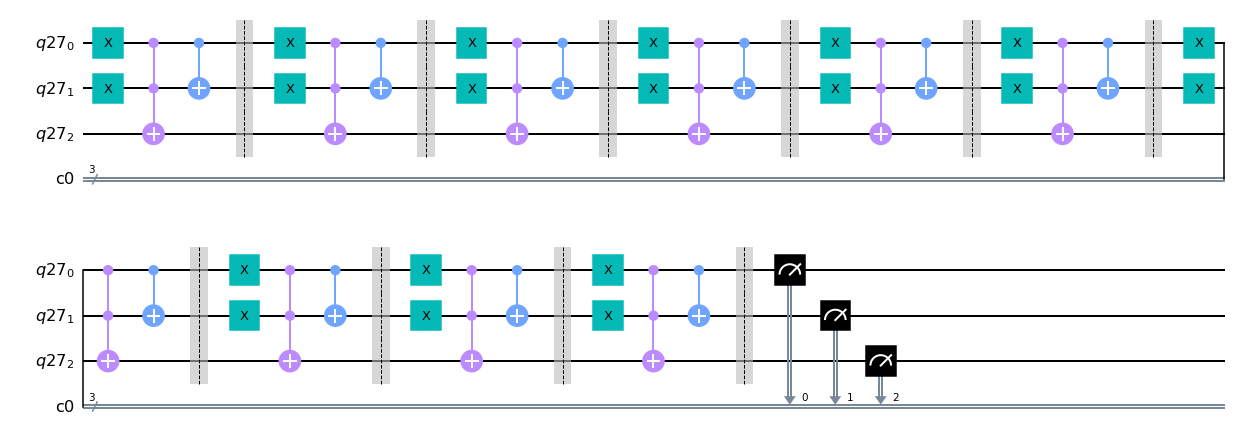

In [16]:
# creamos un circuito para probar

qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
for i in range(10):
    circuit.x(qr[0])
    circuit.x(qr[1])
    circuit.ccx(qr[0], qr[1], qr[2])
    circuit.cx(qr[0], qr[1])
    circuit.barrier()

circuit.measure(qr, cr)

display(circuit.draw('mpl')) 

In [17]:
circuit = transpile(circuit, least_busy_device)               # transpilamos el circuito para el backend en específico

job = least_busy_device.run(circuit)                          # creamos el 'job' al solicitar la ejecución del circuito

print("Identificador del job:\t", job.job_id())               # obtenemos el identificador del 'job'

print("Job creado el:\t\t", job.creation_date())              # preguntamos la fecha de creacion del 'job'
print()

tt = 0                                                        # tiempo transcurrido (en segundos)

job_status = job.status()                                     # preguntamos por el estatus del 'job'

while job_status.name not in ["DONE", "CANCELLED", "ERROR"]:
    try:
        job_status = job.status()                             # preguntamos por el estatus del 'job' nuevamente
        if job_status is JobStatus.RUNNING:
            print("\rEl job sigue ejecutándose, tt = " + str(tt) + " s", end="")
            tt += 1
            sleep(1)
    except IBMQJobApiError as ex:
        print("Algo malo sucedió!: {}".format(ex))


print()
print("\n\t>>>El job ha termiando su ejecución")
print("\n\n")

print("Resultado:\t", job.result().get_counts())               # resultado de la ejecución en el dispositivo real

Identificador del job:	 6107db12e660a623bb5ee8e1
Job creado el:		 2021-08-02 06:46:26.178000-05:00

El job sigue ejecutándose, tt = 5 s

	>>>El job ha termiando su ejecución



Resultado:	 {'000': 142, '001': 102, '010': 171, '011': 92, '100': 111, '101': 107, '110': 185, '111': 114}


<a id="secc1.7"></a>
## Configuración del sistema

Podemos conocer detalles del backend que estamos usando con ayuda de Qiskit al importar `qiskit.tools.jupyter` y después indicar el backend.

En el cuadro que generará la siguiente celda puedes explorar los detalles del backend, uno importante es su arquitectura, es decir, de qué forma están conectados los qubits entre sí y que compuertas es capaz de manejar.

La forma en la que están conectados los qubits limita las compuertas que se pueden usar entre qubits, si por ejemplo, dos quibts no están conectados, entonces no puedes aplicar una compuerta de 2 qubits entre ellos (ejemplo: $CNOT$). Para no tener que batallar con esto, nosotros podemos hacer nuestro diseño de circuito libremente y antes de enviarlo a ejecución a un backend, debemos transpilarlo, proceso que se encargará de reacomodar las compuertas de tal manera que puedan ser ejecutadas, pues las colocará a sabiendas de qué qubits están conectados, así como utilizando las compuertas disponibles para ese banckend en particular.

Si decides dejarle todo el trabajo al transpilador, tendrás que pagar un precio, el rendimiento no será óptimo, por lo que, si lo que deseas es un circuito que se ejecute de forma optimizada, tendrás que **diseñar tu circuito para un backend en específico**, es decir, desde el inicio considerar que qubits están conectados entre sí y de ahí partir para decidir qué compuertas y en qué orden deberán ser aplicadas.

<br>

In [18]:
import qiskit.tools.jupyter

least_busy_device

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

<a id="secc2"></a>
# Referencias

- [1] DiVincenzo's criteria. Consultado en: https://en.wikipedia.org/wiki/DiVincenzo%27s_criteria
- [2] What is a quantum computer, and how do we build one?. Consultado en: https://arxiv.org/pdf/0906.4344.pdf
- [3] The DiVincenzo criteria 20 years on. Consultado en: https://www.nature.com/articles/s42254-020-00256-4
- [4] Quantum Computing: tomorrow's computing, today. Consultado en: https://www.ibm.com/quantum-computing/
- [5] IBM Quantum systems. Consultado en: https://quantum-computing.ibm.com/lab/docs/iql/manage/systems/
- [6] IBM Quantum processor types. Consultado en: https://quantum-computing.ibm.com/lab/docs/iql/manage/systems/processors
- [7] Providers. Consultado en: https://quantum-computing.ibm.com/lab/docs/iql/manage/provider/
- [8] Access systems with your account. Consultado en: https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq
- [9] System configuration. Consultado en: https://quantum-computing.ibm.com/lab/docs/iql/manage/systems/configuration

<table width="100%" style="width:100%">
    <tr style="background-color:white;">
        <td>
            <div style="text-align: left;">
            <a href="02_Visualizar_Experimentos.ipynb" style="color: #EE2A6F; font-size: 15px; font-weight: normal;">
                &lt;&lt; Notebook anterior: 02_Visualizar_Experimentos
            </a>
            </div>
        </td>
        <td>
            <div style="text-align: right;">
            <a href="04_Ruido_En_Experimentos.ipynb" style="color: #EE2A6F; font-size: 15px; font-weight: normal;">
                Notebook siguiente: 04_Ruido_En_Experimentos >>
            </a>
            </div>
        </td>
    </tr>
</table>